In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pds_plots as ppl

/opt/anaconda3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [12]:
import numpy as np

f = np.load('coords_20190604_1.npz')

mf = f['mf']
goc = f['goc']
glo = f['glo']
grc = f['grc_nop']

bbox = [[600,800], [200-20, 400], [0, 200]]

def limit_to_box(x, box):
    mf = x.copy()
    for i, t in enumerate(box):
        mf = mf[mf[:,i]>=t[0], :]
        mf = mf[mf[:,i]<=t[1], :]
    return mf

def fix_coors(x):
    y = x.copy()
    y = y-np.ones(y.shape[1])*25
    box = [bbox[0], [bbox[1][0]+20, bbox[1][1]], bbox[2]]
    return limit_to_box(y, box[:x.shape[1]])

mf = fix_coors(mf)
goc = fix_coors(goc)
glo = fix_coors(glo)
grc = fix_coors(grc)

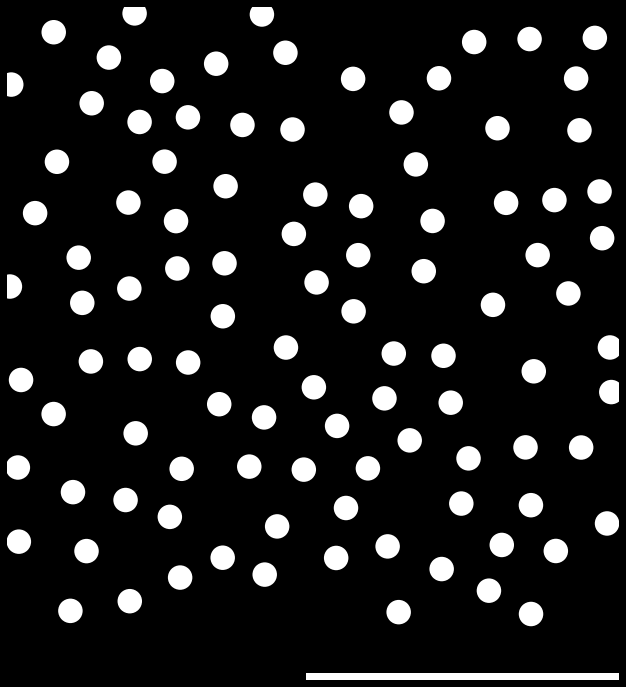

In [13]:
bbox = bbox[:2]
ax = ppl.plot_mf_1(mf, bbox, 4, save=False)
ax.plot([bbox[0][1]-100, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)
# ppl.plot_mf_2(mf, [1500, 700], save=True)
# plt.savefig('mf.png', dpi=300/2.54)

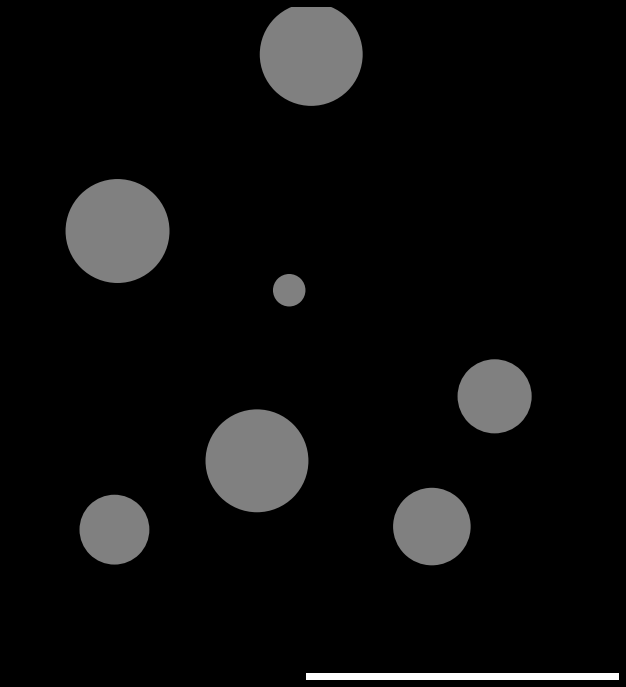

In [14]:
ax = ppl.plot_goc(goc, bbox, 100, 17)
ax.plot([bbox[0][1]-100, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)

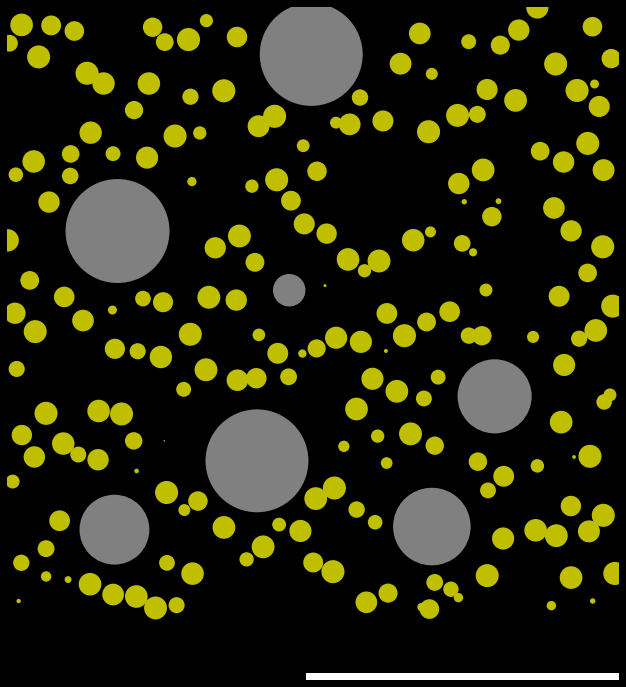

In [15]:
ax = ppl.plot_goc_glo((goc, 17), (glo, 6.6 / 1.75), bbox, 100)
ax.plot([bbox[0][1]-100, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)

#         plt.savefig('goc+glo.png', dpi=300

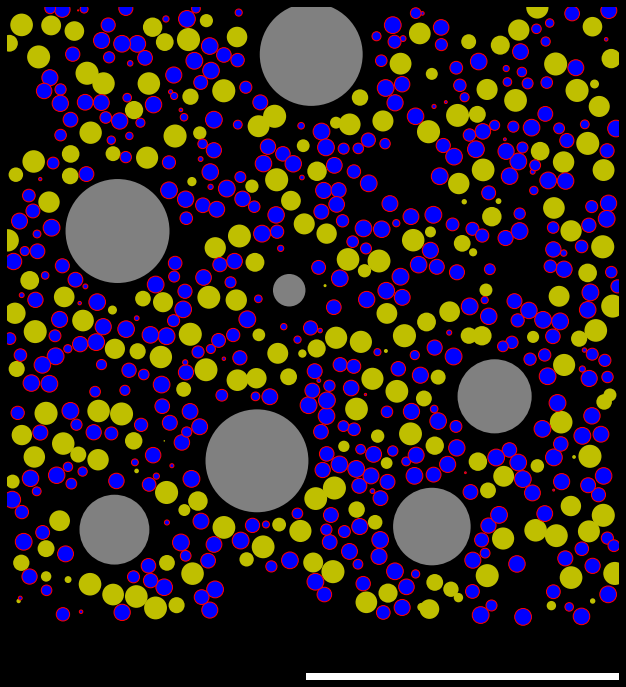

In [16]:
ax = ppl.plot_all_pop(
    (goc, 17),
    (glo, 6.6 / 1.75),
    (grc, 2.75),
    bbox, 100)
ax.plot([bbox[0][1]-100, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)


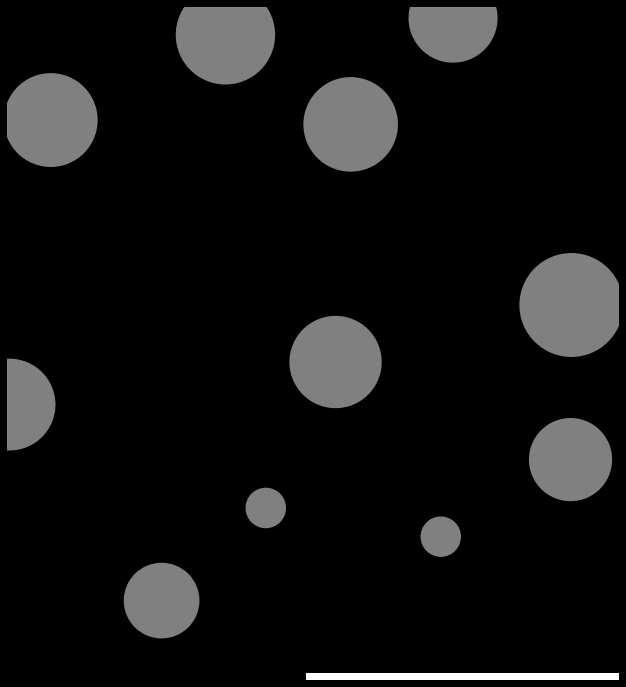

In [17]:
def to_yzx(x):
    y = x.copy()
    y[:,0] = x[:,1]
    y[:,1] = x[:,2]
    y[:,2] = x[:,0]
    return y

goc = to_yzx(goc)
glo = to_yzx(glo)
grc = to_yzx(grc)

bbox = [[200,400], [0-20, 200]]
ax = ppl.plot_goc(goc, bbox, 700, 17)
ax.plot([bbox[0][1]-100, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)

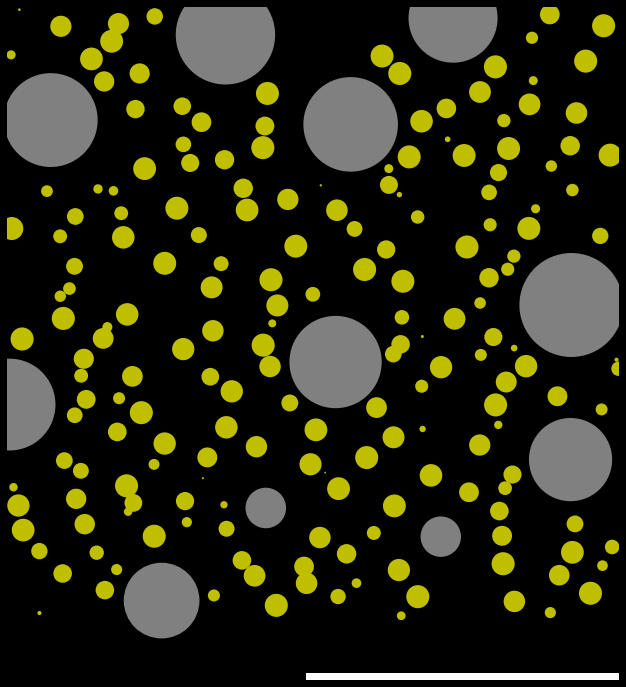

In [18]:
ax = ppl.plot_goc_glo((goc, 17), (glo, 6.6 / 1.75), bbox, 700)
ax.plot([bbox[0][1]-100, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)

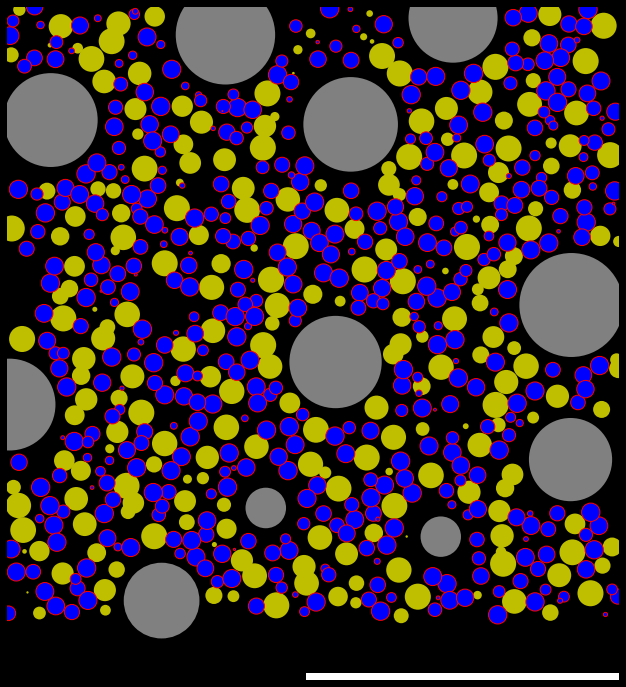

In [20]:
ax = ppl.plot_all_pop(
    (goc, 17),
    (glo, 6.6/1.55),
    (grc, 3),
    bbox, 700)
ax.plot([bbox[0][1]-100, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)
